In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [34]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\국토교통부 국토지리정보원_항공사진_항공사진기본메타데이터\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\국토교통부 국토지리정보원_항공사진_항공사진기본메타데이터\\국토교통부 국토지리정보원_항공사진_항공사진기본메타데이터_20211125.csv']

In [92]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,코스번호,사진번호,파일식별자,적용대상자료명칭,언어,책임기관명,책임부서명,책임부서전화,책임부서팩스,책임부서세부주소,...,배포부서명,배포부서전화,해상도,품질적용대상,독취방식,매질종류,평가기준규정,행정구역명,행정구역코드,Unnamed: 28
0,56,3,201804104C00560003,항공사진 이미지,한국어,국토지리정보원,공간영상과,031-210-2700,031-210-2743,경기도 수원시 영통구 월드컵로 92,...,공간영상과,031-210-2683,0.25m,항공사진 이미지,면형방식,디지털영상,영상지도제작에 관한 작업규정,경기도김포시양촌면,41570,NaN
1,56,30,201804104C00560030,항공사진 이미지,한국어,국토지리정보원,공간영상과,031-210-2700,031-210-2743,경기도 수원시 영통구 월드컵로 92,...,공간영상과,031-210-2683,0.25m,항공사진 이미지,면형방식,디지털영상,영상지도제작에 관한 작업규정,경기도고양시 덕양구동산동,41281,NaN
2,56,31,201804104C00560031,항공사진 이미지,한국어,국토지리정보원,공간영상과,031-210-2700,031-210-2743,경기도 수원시 영통구 월드컵로 92,...,공간영상과,031-210-2683,0.25m,항공사진 이미지,면형방식,디지털영상,영상지도제작에 관한 작업규정,경기도고양시 덕양구지축동,41281,NaN
3,56,32,201804104C00560032,항공사진 이미지,한국어,국토지리정보원,공간영상과,031-210-2700,031-210-2743,경기도 수원시 영통구 월드컵로 92,...,공간영상과,031-210-2683,0.25m,항공사진 이미지,면형방식,디지털영상,영상지도제작에 관한 작업규정,서울특별시은평구진관동,11380,NaN
4,56,33,201804104C00560033,항공사진 이미지,한국어,국토지리정보원,공간영상과,031-210-2700,031-210-2743,경기도 수원시 영통구 월드컵로 92,...,공간영상과,031-210-2683,0.25m,항공사진 이미지,면형방식,디지털영상,영상지도제작에 관한 작업규정,서울특별시은평구진관동,11380,NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   코스번호         1048575 non-null  object 
 1   사진번호         1048575 non-null  object 
 2   파일식별자        1048575 non-null  object 
 3   적용대상자료명칭     1048575 non-null  object 
 4   언어           1048575 non-null  object 
 5   책임기관명        1048575 non-null  object 
 6   책임부서명        1048575 non-null  object 
 7   책임부서전화       1048575 non-null  object 
 8   책임부서팩스       1048575 non-null  object 
 9   책임부서세부주소     1048575 non-null  object 
 10  책임부서우편번호     1048575 non-null  object 
 11  메타데이터작성일     1047339 non-null  object 
 12  메타데이터버전      1048575 non-null  object 
 13  자료구축기관       1048575 non-null  object 
 14  입력회사         1048575 non-null  object 
 15  공간표현방식       1048575 non-null  object 
 16  배포포맷명칭       1048575 non-null  object 
 17  배포포맷버전       1048575 non-null  object 
 18  배포

In [37]:
df.describe()

,Unnamed: 28
count,10.0
mean,27140.0
std,0.0
min,27140.0
25%,27140.0
50%,27140.0
75%,27140.0
max,27140.0


In [38]:
df.describe(include=np.object)

,코스번호,사진번호,파일식별자,적용대상자료명칭,언어,책임기관명,책임부서명,책임부서전화,책임부서팩스,책임부서세부주소,...,배포기관명,배포부서명,배포부서전화,해상도,품질적용대상,독취방식,매질종류,평가기준규정,행정구역명,행정구역코드
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,...,1048575,1048575,1048575,1026283,1048575,1014231,1047896,1048575,883608,844208.0
unique,1445,2780,752200,4,2,10,9,362,360,370,...,10,12,43,41,6,48,7,7,12219,919.0
top,1,2,1.95403E+17,항공사진 이미지,한국어,국토지리정보원,공간영상과,031-210-2700,031-210-2743,경기도 수원시 영통구 월드컵로 92,...,국토지리정보원,공간영상과,031-210-2600,0.25m,항공사진 이미지,면형방식,디지털영상,영상지도제작에관한작업규정,대한민국,46910.0
freq,43588,30388,18616,565749,1044987,898875,994184,1021964,1021996,753050,...,885167,994290,688628,580326,483899,586983,799052,605216,8490,11377.0


In [10]:
df.isnull().sum()

코스번호                 0
사진번호                 0
파일식별자                0
적용대상자료명칭             0
언어                   0
책임기관명                0
책임부서명                0
책임부서전화               0
책임부서팩스               0
책임부서세부주소             0
책임부서우편번호             0
메타데이터작성일          1236
메타데이터버전              0
자료구축기관               0
입력회사                 0
공간표현방식               0
배포포맷명칭               0
배포포맷버전               0
배포기관명                0
배포부서명                0
배포부서전화               0
해상도              22292
품질적용대상               0
독취방식             34344
매질종류               679
평가기준규정               0
행정구역명           164967
행정구역코드          204367
Unnamed: 28    1048565
dtype: int64

## 전처리

In [94]:
df.drop(['코스번호','사진번호','언어','책임부서우편번호','책임부서전화','책임부서팩스','배포부서전화',
        '공간표현방식','배포포맷명칭','배포포맷버전','품질적용대상','행정구역코드','Unnamed: 28'],axis=1,inplace=True)

In [95]:
df.fillna('None',inplace=True)

In [96]:
df['적용대상자료명칭'] = df['적용대상자료명칭'].apply(lambda x : '항공사진 근적외 이미지' if '근적외' in x else '항공사진 이미지')

In [97]:
def to_year(x):
    if x=='None' or x=='        ':
        return 'None'
    x = str(int(x))
    dat = datetime.strptime(x,'%Y%m%d')
    return str(dat.year)

def to_month(x):
    if x=='None' or x=='        ':
        return -1
    x = str(int(x))
    dat = datetime.strptime(x,'%Y%m%d')
    return dat.month

df['연도'] = df['메타데이터작성일'].apply(to_year)
df['월'] = df['메타데이터작성일'].apply(to_month)

In [98]:
df['책임기관명'] = df['책임기관명'].apply(lambda x : x.strip())

In [99]:
df.describe(include=np.object)

,파일식별자,적용대상자료명칭,책임기관명,책임부서명,책임부서세부주소,메타데이터작성일,메타데이터버전,자료구축기관,입력회사,배포기관명,배포부서명,해상도,독취방식,매질종류,평가기준규정,행정구역명,연도
count,1048575,1048575,1048575,1048575,1048575,1048575.0,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,752200,2,9,9,370,731.0,14,13,62,10,12,42,49,8,7,12220,22
top,1.95403E+17,항공사진 이미지,국토지리정보원,공간영상과,경기도 수원시 영통구 월드컵로 92,20101125.0,제2판,국토지리정보원,새한항업㈜,국토지리정보원,공간영상과,0.25m,면형방식,디지털영상,영상지도제작에관한작업규정,None,2017
freq,18616,992810,1021995,994184,753050,21095.0,828975,1004062,146472,885167,994290,580326,586983,799052,605216,164967,154784


## 시각화

<AxesSubplot: ylabel='파일식별자'>

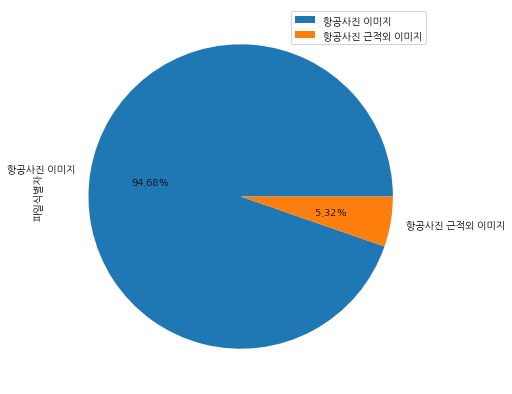

In [65]:
sub_df = df.groupby('적용대상자료명칭',as_index=False)['파일식별자'].count().sort_values('파일식별자',ascending=False)
fig,ax = plt.subplots(1,1,figsize=(7,7))
sub_df.plot.pie(y='파일식별자',labels=sub_df['적용대상자료명칭'].unique(),ax=ax,autopct='%.2f%%')

[Text(0.5, 1.0, '책임기관별 분포')]

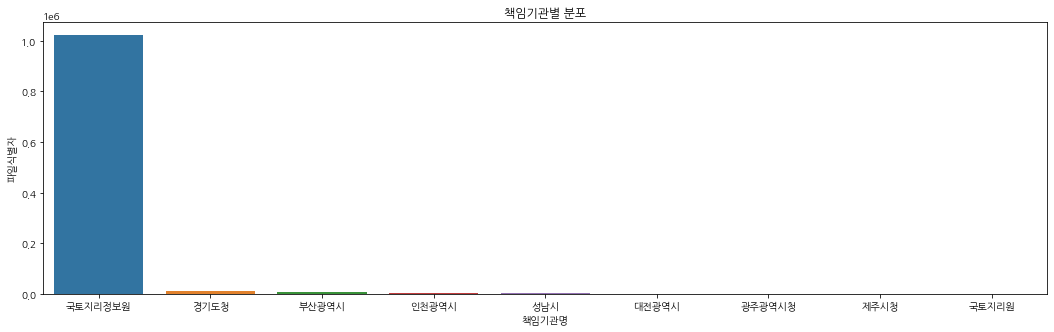

In [79]:
sub_df = df.groupby('책임기관명',as_index=False)['파일식별자'].count().sort_values('파일식별자',ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='책임기관명',y='파일식별자').set(title='책임기관별 분포')

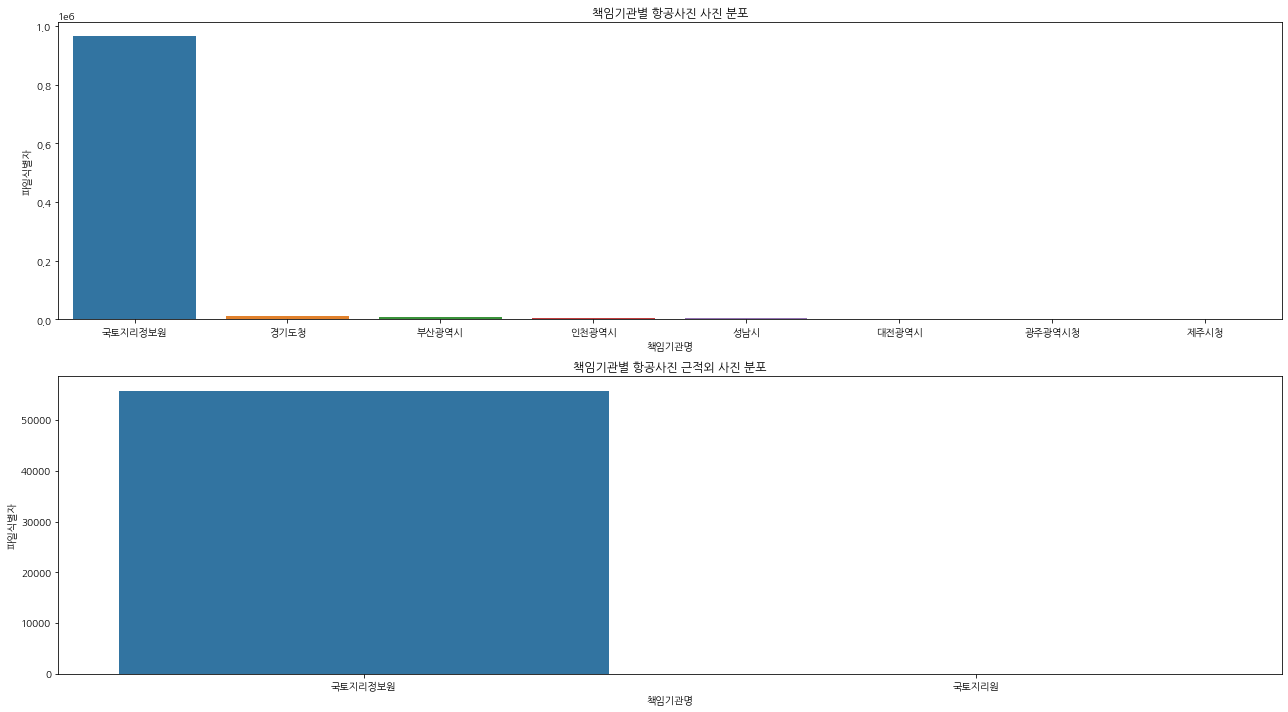

In [80]:
sub_df1 = df[df['적용대상자료명칭']=='항공사진 이미지'].groupby('책임기관명',as_index=False)['파일식별자'].count().sort_values('파일식별자',ascending=False)
sub_df2 = df[df['적용대상자료명칭']!='항공사진 이미지'].groupby('책임기관명',as_index=False)['파일식별자'].count().sort_values('파일식별자',ascending=False)
fig,axes = plt.subplots(2,1,figsize=(18,10))
sns.barplot(data=sub_df1,x='책임기관명',y='파일식별자',ax=axes[0]).set(title='책임기관별 항공사진 사진 분포')
sns.barplot(data=sub_df2,x='책임기관명',y='파일식별자',ax=axes[1]).set(title='책임기관별 항공사진 근적외 사진 분포')
plt.tight_layout()

[Text(0.5, 1.0, '책임부서별 항공사진 근적외 사진 분포')]

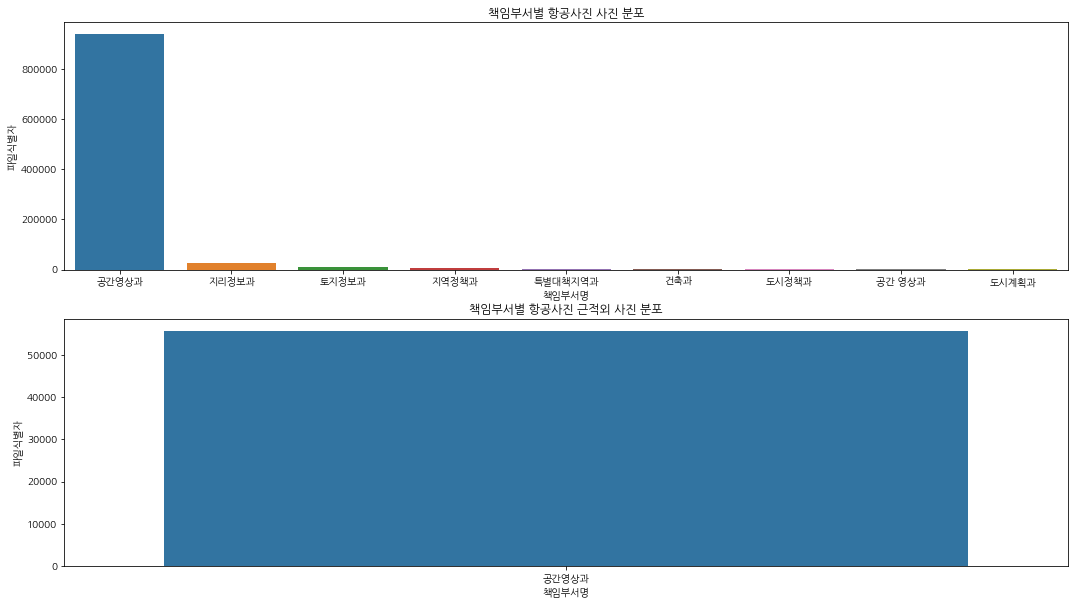

In [82]:
sub_df1 = df[df['적용대상자료명칭']=='항공사진 이미지'].groupby('책임부서명',as_index=False)['파일식별자'].count().sort_values('파일식별자',ascending=False)
sub_df2 = df[df['적용대상자료명칭']!='항공사진 이미지'].groupby('책임부서명',as_index=False)['파일식별자'].count().sort_values('파일식별자',ascending=False)
fig,axes = plt.subplots(2,1,figsize=(18,10))
sns.barplot(data=sub_df1,x='책임부서명',y='파일식별자',ax=axes[0]).set(title='책임부서별 항공사진 사진 분포')
sns.barplot(data=sub_df2,x='책임부서명',y='파일식별자',ax=axes[1]).set(title='책임부서별 항공사진 근적외 사진 분포')

[Text(0.5, 1.0, '연도별 분포')]

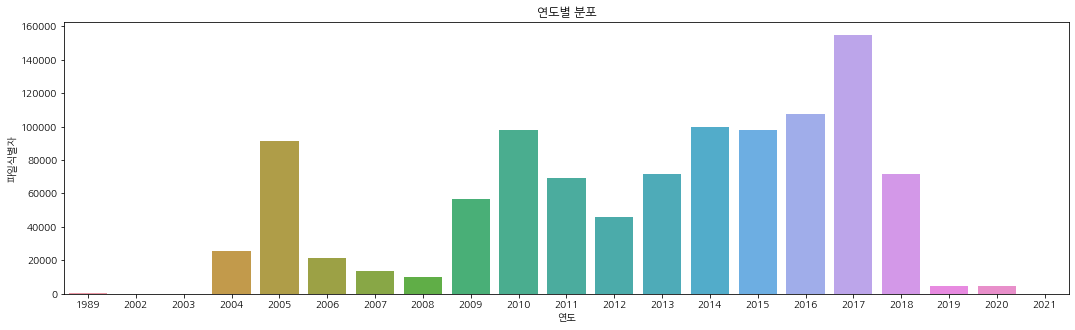

In [85]:
sub_df = df[df['연도']!='None'].groupby('연도',as_index=False)['파일식별자'].count().sort_values('연도')
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='연도',y='파일식별자').set(title='연도별 분포')

[Text(0.5, 1.0, '월별 분포')]

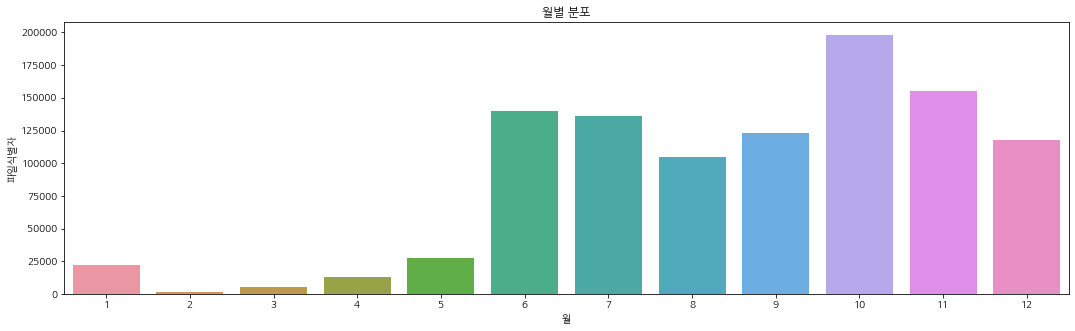

In [102]:
sub_df = df[df['월']!=-1].groupby('월',as_index=False)['파일식별자'].count().sort_values('월')
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='월',y='파일식별자').set(title='월별 분포')

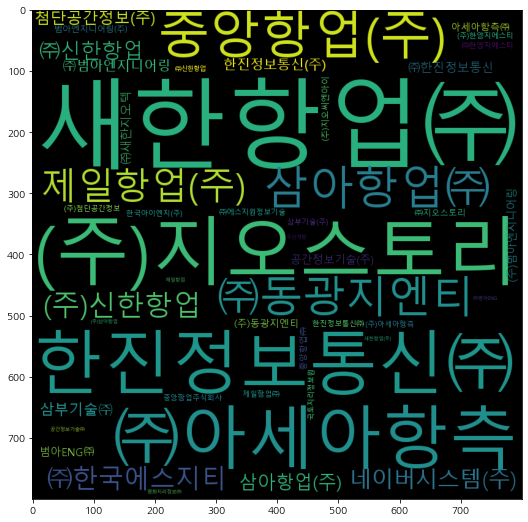

In [107]:
c = Counter(df['입력회사'].values)
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(9,9))
plt.imshow(gen)

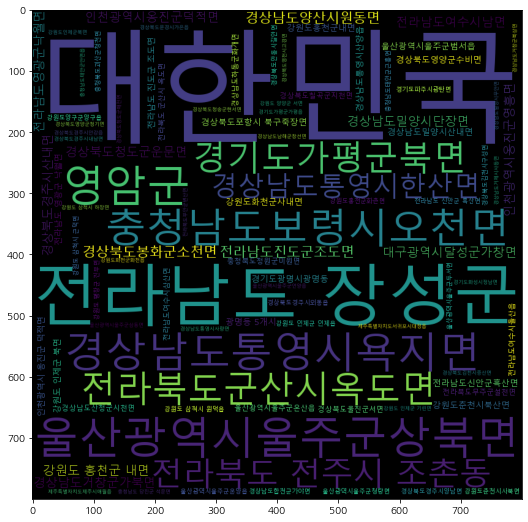

In [116]:
c = Counter(df[(df['책임기관명']=='국토지리정보원')&(df['행정구역명']!='None')]['행정구역명'].values)
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(9,9))
plt.imshow(gen)

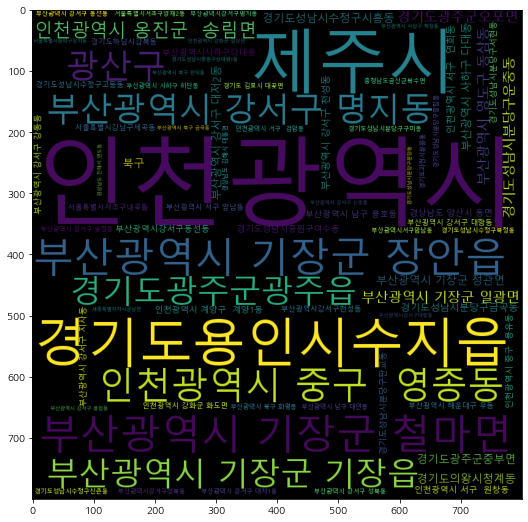

In [117]:
c = Counter(df[(df['책임기관명']!='국토지리정보원')&(df['행정구역명']!='None')]['행정구역명'].values)
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(9,9))
plt.imshow(gen)